### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading Data

In [2]:
data = pd.read_csv('Admission_Predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(400, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Pre Processing
### 1.Finding out if there are any null values

In [7]:
Null=data.isnull()
Null.sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### 2.Duplicate detection

In [8]:
data.duplicated().sum()

0

### 3.Dropping unwanted columns

In [9]:
data.drop('Serial No.', axis='columns', inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Visualization
### 1.GRE Score

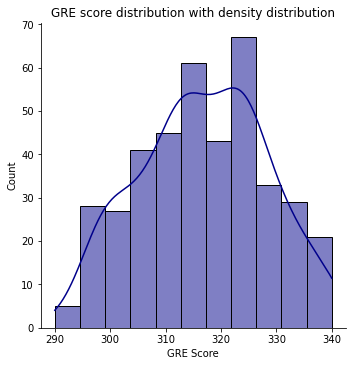

In [10]:
sns.displot(x=data["GRE Score"], kde=True, color='darkblue')
plt.title("GRE score distribution with density distribution");

### 2.TOFEL Score :

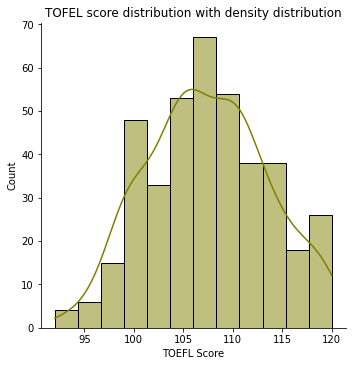

In [11]:
sns.displot(x=data["TOEFL Score"], kde=True, color='olive')
plt.title("TOFEL score distribution with density distribution");

### 3. University Ratings

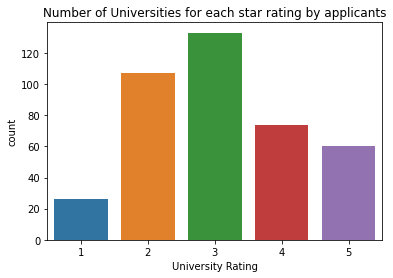

In [12]:
sns.countplot(x=data["University Rating"]);
plt.title("Number of Universities for each star rating by applicants");

### 4. SOP : Statement for purpose

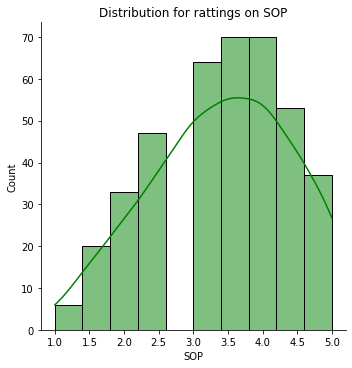

In [13]:
sns.displot(x=data["SOP"], kde=True, color='green');
plt.title("Distribution for rattings on SOP");

### 5. LOR : Letter of Recommendations

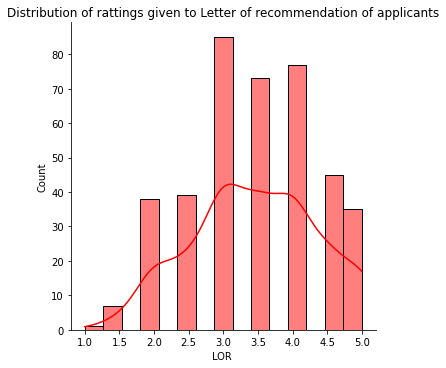

In [14]:
sns.displot(x=data["LOR "], kde=True, color='red');
plt.title("Distribution of rattings given to Letter of recommendation of applicants");

### 6.CGPA

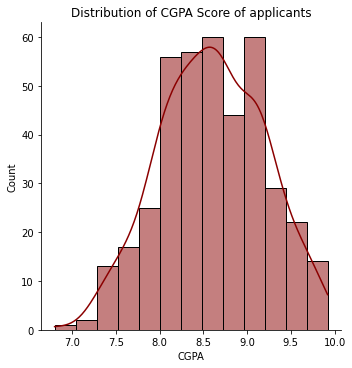

In [15]:
sns.displot(x=data["CGPA"], kde=True, color='darkred');
plt.title("Distribution of CGPA Score of applicants");

### 7.RESEARCH

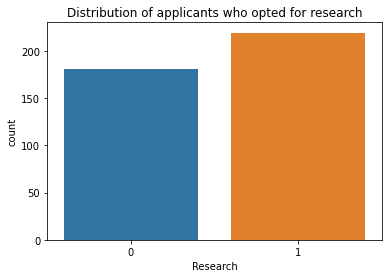

In [16]:
sns.countplot(x=data["Research"]);
plt.title("Distribution of applicants who opted for research");

### 8.Chance of Admit

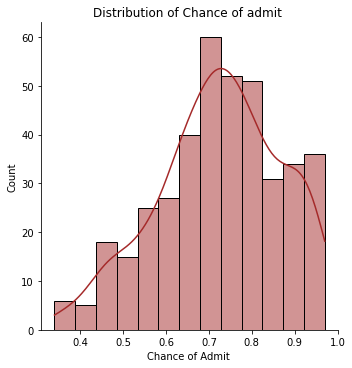

In [17]:
sns.displot(x=data["Chance of Admit "], kde=True, color='brown');
plt.title("Distribution of Chance of admit ");

### Bivariate Analysis

#### 1.Comparision of GRE Score with Chance of Admit and Research :

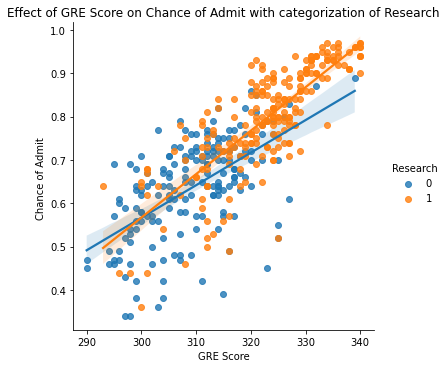

In [18]:
sns.lmplot(y="Chance of Admit ", x = "GRE Score", hue="Research", data=data);
plt.title("Effect of GRE Score on Chance of Admit with categorization of Research");

#### 2.Comparision of TOFEL Score with Chance of Admit and Research :

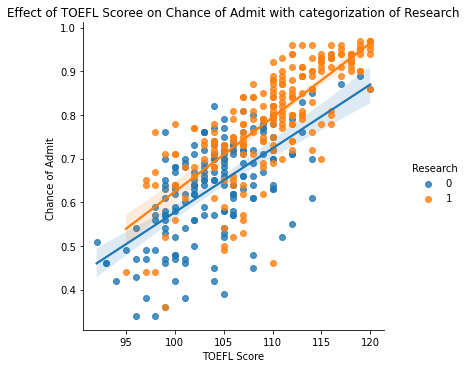

In [19]:
sns.lmplot(y="Chance of Admit ", x = "TOEFL Score", hue="Research", data=data);
plt.title("Effect of TOEFL Scoree on Chance of Admit with categorization of Research");

#### 3.Comparision of University Score with Chance of Admit and Research :

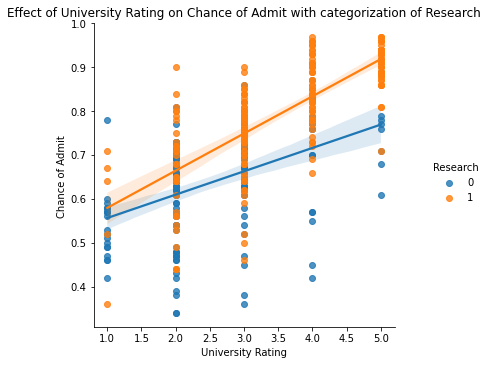

In [20]:
sns.lmplot(y="Chance of Admit ", x = "University Rating", hue="Research", data=data);
plt.title("Effect of University Rating on Chance of Admit with categorization of Research");

#### 4.Comparision of Statement of purpose (SOP) with Chance of Admit and Research :

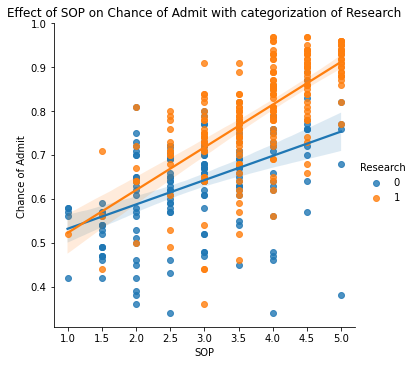

In [21]:
sns.lmplot(y="Chance of Admit ", x = "SOP", hue="Research", data=data);
plt.title("Effect of SOP on Chance of Admit with categorization of Research");

#### 5. Comparision of Letter of Recommendations (LOR) with Chance of Admit and Research :

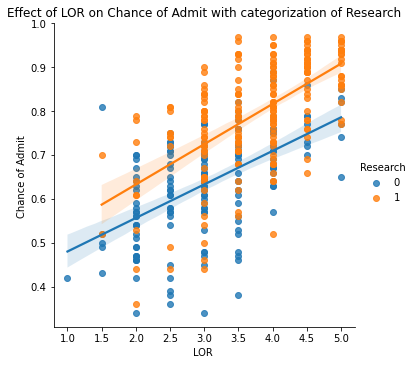

In [22]:
sns.lmplot(y="Chance of Admit ", x = "LOR ", hue="Research", data=data);
plt.title("Effect of LOR on Chance of Admit with categorization of Research");

#### 6.Comparision of CGPA with Chance of Admit and Research

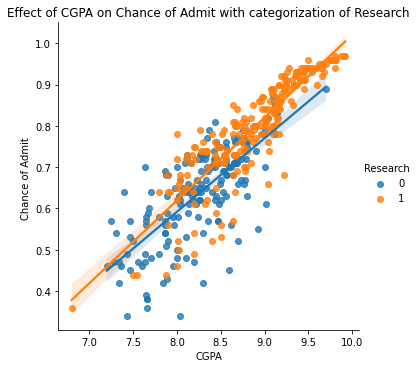

In [23]:
sns.lmplot(y="Chance of Admit ", x = "CGPA", hue="Research", data=data);
plt.title("Effect of CGPA on Chance of Admit with categorization of Research");

In [24]:
data = data.reset_index(drop=True)

## Model Building :

### 1.Data Preprations:

In [25]:
X = data[data.columns.drop('Chance of Admit ')]
y = data["Chance of Admit "]

In [26]:
X.shape

(400, 7)

In [27]:
y.shape

(400,)

### 2. Train test split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [29]:
X_train.shape

(320, 7)

In [30]:
X_test.shape

(80, 7)

### Applying different types of Algorithms

#### 1.Linear Regression

In [31]:
#model
linear_regression = LinearRegression()
#training
linear_regression.fit(X_train, y_train)


LinearRegression()

In [32]:
model = LinearRegression(normalize=True)
model.fit(X_test, y_test)
# model.score(X_test, y_test)
print ("Accuracy : ",model.score(X_test, y_test)*100)
methodDict = {}
methodDict['Linear Regression'] = model.score(X_test, y_test)*100

Accuracy :  80.7216438856893


In [33]:
from sklearn.ensemble import RandomForestRegressor
rgr=RandomForestRegressor()
rgr.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
print ("Accuracy : ",rgr.score(X_test, y_test)*100)
methodDict['Random Forest'] = rgr.score(X_test, y_test)*100

Accuracy :  73.10462246490859


In [36]:
import xgboost as xgb
xg = xgb.XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [37]:
print ("Accuracy : ",xg.score(X_test, y_test)*100)
methodDict['XG Boost'] = xg.score(X_test, y_test)*100

Accuracy :  65.0355528256066


In [38]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([0, 100.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

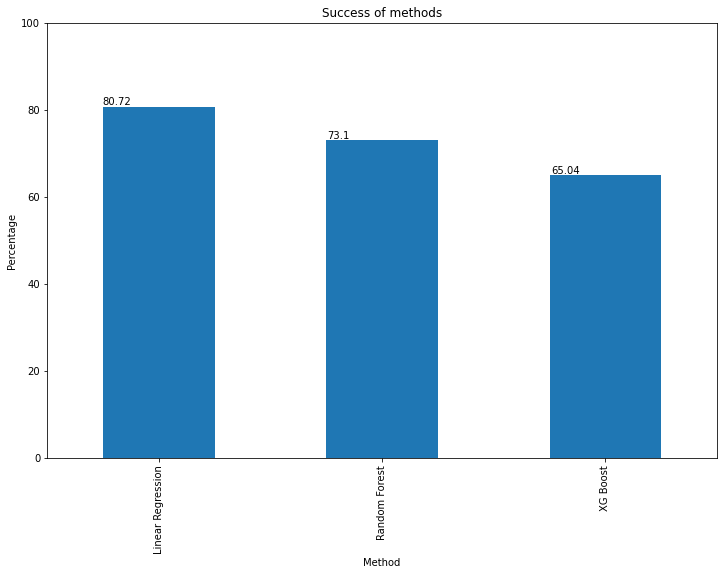

In [39]:
plotSuccess()

### The model finally predicts the data based on user input

In [40]:
print('The chance of you getting an admit in the US is {}%'.format(round(model.predict([[330, 115, 5, 4.5, 3, 9.34, 1]])[0]*100, 1)))

The chance of you getting an admit in the US is 88.1%


In [41]:
import pickle

In [42]:
#  Saving the model to the local file system
filename='final_model.pickle'
pickle.dump(linear_regression,open(filename,'wb'))